# Tutorial Time- Central Tendency

This tutorial is based on the provided data and information in Lesson 10, 11 in Bertelsmann Data Science Challenge course<br/>
Prepared with love by Gasia Atashian


In this tutorial you will learn to calculate the MODE, MEAN AND MEDIAN using python code

# Setup, importing libraries

<span style="color:blue">
import libraries <br/>
numpy is the fundamental package for scientific computing with Python <br/>
pandas is used for data structures and data analysis tools <br/>
scipy is a fundamental library for scientific computing <br/>
matplotlib is a plotting library to generate plots <br/>
ps: # is used for comments
</span>

In [1]:
# usually the libraries are imported with a shorter name 
#(you can use any alias but np, pd and plt are the most common) 

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# to make the output of plotting commands display inline within jupyter notebook
%matplotlib inline  

# Mode

Mode is the value that occurs the most number of times in the data

##### data 1

In [2]:
simple_data = np.array([2, 5, 5, 9, 8, 3])

In [3]:
print(simple_data)
print('type of data is {}'.format(type(simple_data)))

[2 5 5 9 8 3]
type of data is <class 'numpy.ndarray'>


#####  mode calculation

In [4]:
# to calculate the mode, we use mode method of stats library
data_mode = stats.mode(simple_data)
print(data_mode)

ModeResult(mode=array([5]), count=array([2]))


note that the method returns the mode and the count of the mode in the data

-----------

##### data 2

let's gnerate a data from normal distribution and calculate the mode

In [5]:
mu, sigma = 0, 20 # mean and standard deviation
norm_dist_data = np.random.normal(mu, sigma, 1000) #generate 1000 data points form normal distribution with the specified mean and standard deviation

In [6]:
print(norm_dist_data[:10]) 

[ -5.0400732   10.692158    12.58182574   3.93407853  21.30037829
 -47.74509105   7.53559842 -47.2467503    1.49753495  25.95758151]


notice that our data is of float type (not integer)

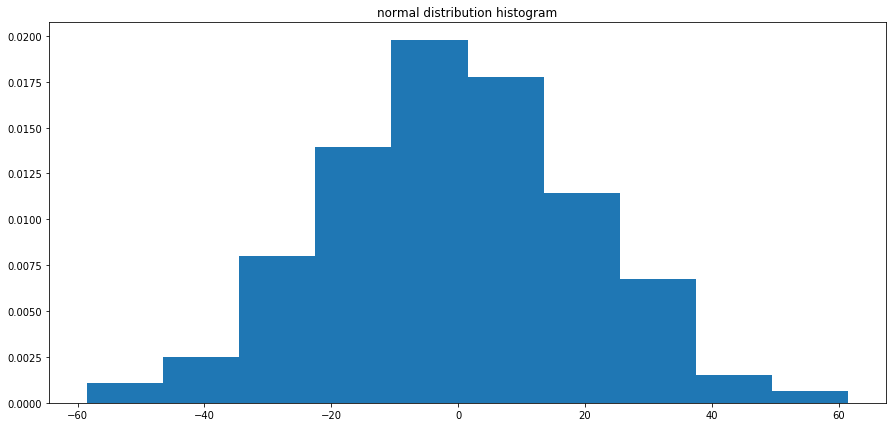

In [7]:
plt.figure(figsize = (15,7))
plt.hist(norm_dist_data, 10, normed=True)
plt.title('normal distribution histogram')
plt.show()

##### mode calculation

In [8]:
data_mode = stats.mode(norm_dist_data)
print(data_mode)

ModeResult(mode=array([-58.49452174]), count=array([1]))


we can notice the failure of the stats.mode() to determine the mode.
However let's figure out if it is a failure, or if there is no mode

we can calculate the frequencies as we did in the last tutorial with the help of Counter method from collections library <br/>
we also use .most_common() method, to sort them by descending order


In [9]:
from collections import Counter

In [10]:
print(Counter(norm_dist_data).most_common()[:5])

[(-5.040073198089887, 1), (10.692158000151924, 1), (12.581825737335997, 1), (3.934078528686383, 1), (21.300378286665968, 1)]


We conclude that there is no mode, as the first number in the sorted frequencies occurs only once in the data, each data point is unique

but we can define the mode on a range, looking to the graph, the range that occurs with the highest frequency is from almos [-10:5 ] (since we are generating random numbers, you may have different range if you run the code cell by cell, however your answer should include 0)

----------------

##### data 3

let's generate data from two normal distributions with two different means

In [11]:
mu, sigma = -10, 5 # mean and standard deviation
norm_dist_data_1 = np.random.normal(mu, sigma, 1000) #generate 1000 data points form normal distribution with the specified mean and standard deviation

mu, sigma = 10, 5 # mean and standard deviation
norm_dist_data_2 = np.random.normal(mu, sigma, 1000) #generate 1000 data points form normal distribution with the specified mean and standard deviation

let's concatinate the two data sets, to have one data

we use concatinate method of numpy library to concatinate two different nump arrays

In [12]:
combined_norm_dist_data = np.concatenate((norm_dist_data_1,norm_dist_data_2))

to make sure that we combined the two arrays, let's compare their lengths

In [13]:
print('data 1 length is: {}'.format(len(norm_dist_data_1)))
print('data 2 length is: {}'.format(len(norm_dist_data_2)))
print('combined data length is: {}'.format(len(combined_norm_dist_data)))

data 1 length is: 1000
data 2 length is: 1000
combined data length is: 2000


histogram plot time:

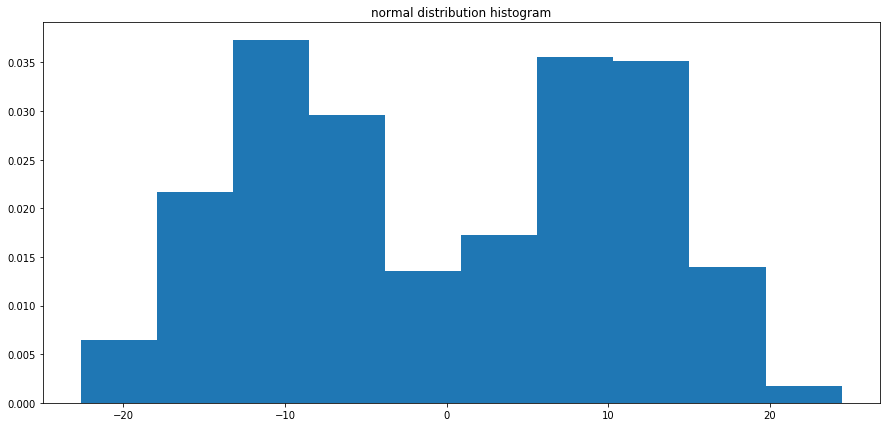

In [14]:
plt.figure(figsize = (15,7))
plt.hist(combined_norm_dist_data, 10, normed=True)
plt.title('normal distribution histogram')
plt.show()

#####  mode calculation

same logic as above example, we have real values we can't calculate the mode using scipy.mode() method, but we can give mode range approximation, for this data we can notice that we have two mode ranges one range is around 10, the other range is around -10. We call this data  **bimodal **; which means the data has two modes.

------------------

# Mean

mean is the average of the all values, the formula to calculate the mean is to sum all the values and divide the sum by the number of values

##### data

this data is taken from lesson 10 section 11

In [15]:
nursing_data = np.array([58350, 63120, 44640, 56380, 72250])
geography_data = np.array([48670, 57320, 38150, 41290, 53160])

let's make a dataframe for data visualization, but we will use the numpy arrays for calculations

In [16]:
pd.DataFrame({'Nursing':nursing_data, 'Geography': geography_data})

,Geography,Nursing
0,48670,58350
1,57320,63120
2,38150,44640
3,41290,56380
4,53160,72250


#####  mean calculation

we can use mean method of numpy library to calculate the mean

In [17]:
mean_nursing = np.mean(nursing_data)
mean_geography = np.mean(geography_data)
print('nursing data mean is {}'.format(mean_nursing))
print('geography data mean is {}'.format(mean_geography))

nursing data mean is 58948.0
geography data mean is 47718.0


we could also calculate the mean by summing the values and dividing by the number of values:

In [18]:
mean_nursing = np.sum(nursing_data)/ len(nursing_data)
mean_geography = np.sum(geography_data)/len(geography_data)
print('nursing data mean is {}'.format(mean_nursing))
print('geography data mean is {}'.format(mean_geography))

nursing data mean is 58948.0
geography data mean is 47718.0


Yey we got the same results!

----------

# Median

is the middle value of the data

##### data

let's use the same data as above

In [19]:
nursing_data = np.array([58350, 63120, 44640, 56380, 72250])
geography_data = np.array([48670, 57320, 38150, 41290, 53160])

#####  median calculation

In [20]:
np.median(nursing_data)

58350.0

we can use median method of numpy library to calculate the mean

In [21]:
median_nursing = np.median(nursing_data)
median_geography = np.median(geography_data)
print('nursing data median is {}'.format(median_nursing))
print('geography data mean is {}'.format(median_geography))

nursing data median is 58350.0
geography data mean is 48670.0


----------------

---------------------

# Practice using Facebook Friends poll Data

I downloaded the facebook friends data as a csv format from the provided link: https://docs.google.com/spreadsheets/d/1g5z8vcrMmvsivvBFzjV3ccnDXi4bWWYY4UYqcOnUgAk/edit#gid=0

we will read the csv file and do experiments on

to read a csv file we use the read_csv method of pandas library

In [22]:
# we have a timestamp column in our data, we use parse_dates so that python interpret the Timestamp column as a date
faceboo_df = pd.read_csv('./data/Facebook_friends.csv', parse_dates=(['Timestamp']))

In [23]:
faceboo_df.head()

,Timestamp,How many Facebook friends do you have?
0,2013-01-02 16:59:06,0
1,2013-01-02 15:20:50,69
2,2013-01-02 16:16:51,123
3,2013-01-02 18:14:04,137
4,2013-01-02 20:04:27,174


it is inconvenient to have long column name, as everythime we need to access that column we should write a long name.
so let's change the column name to #friends, meaning number of friends

In [24]:
faceboo_df = faceboo_df.rename(columns = {'How many Facebook friends do you have?':'#friends'})

In [25]:
faceboo_df.head() #much better

,Timestamp,#friends
0,2013-01-02 16:59:06,0
1,2013-01-02 15:20:50,69
2,2013-01-02 16:16:51,123
3,2013-01-02 18:14:04,137
4,2013-01-02 20:04:27,174


In [26]:
faceboo_df['#friends'].values
#notice that the values type is not integer, let's convert them to integer type

array([   0,   69,  123,  137,  174,  240,  241,  256,  258,  322,  366,
        376,  408,  479,  555,  589,  600,  777,  784,  822,  850,  863,
       1116, 1143, 1214, 1250, 1776])

In [27]:
# to get the type of each column
faceboo_df.dtypes

Timestamp    datetime64[ns]
#friends              int64
dtype: object

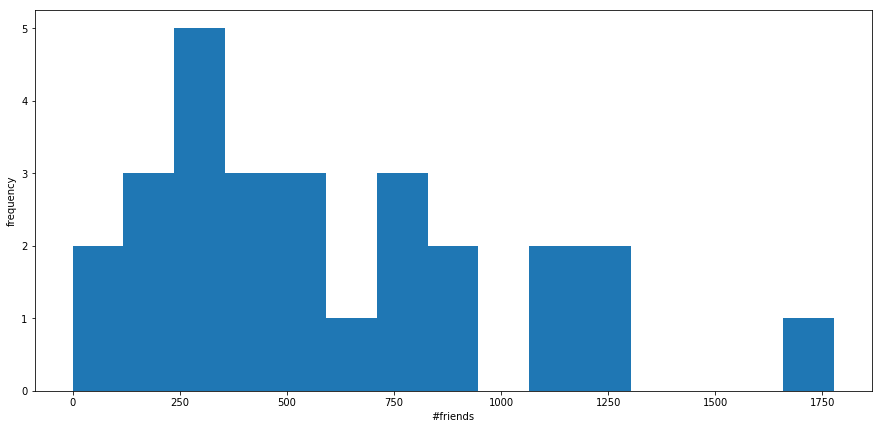

In [28]:
plt.figure(figsize = (15,7))
plt.hist(faceboo_df['#friends'], bins = 15)
plt.xlabel('#friends')
plt.ylabel('frequency')
plt
plt.show()

#### now let's calculate the mean, median and mode of #friends

In [29]:
mean_friends = np.mean(faceboo_df['#friends'].values)
median_friends = np.median(faceboo_df['#friends'].values)
mode_friends = stats.mode(faceboo_df['#friends'].values)

In [30]:
print('facebook friends mean is {}'.format(mean_friends))
print('facebook friends median is {}'.format(median_friends))
print('facebook friends mode is {}'.format(mode_friends))

facebook friends mean is 584.7407407407408
facebook friends median is 479.0
facebook friends mode is ModeResult(mode=array([0]), count=array([1]))


------------------------------------

# THE END
# GASIA ATASHIAN